In [204]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 0. Read data

In [205]:
df = pd.read_csv('../data/spotify_clean.csv')

In [206]:
df.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,Very Low,99.373
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,Very Low,137.373
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,Very Low,170.267
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,Very Low,152.427
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,Very Low,82.625


In [207]:
df.columns

Index(['Unnamed: 0', 'genre', 'artist_name', 'track_name', 'track_id',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity_class',
       'duration_s'],
      dtype='object')

## 0.1 Drop the useless columns

- Drop *genre, artist_name, track_name, track_id, popularity, duration_s, valence, tempo, key, time_signature, mode*

In [208]:
df.dtypes

Unnamed: 0            int64
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
popularity_class     object
duration_s          float64
dtype: object

In [209]:
df = df.drop(columns=['Unnamed: 0', 'genre', 'artist_name', 'track_name', 'track_id','key','time_signature', 'mode','popularity'])

## 1. Perfom Train Test Split

In [210]:
X = df.drop(columns=["popularity_class"], axis = 1)
y = df["popularity_class"]

In [211]:
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,99.373
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,137.373
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,170.267
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,152.427
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,82.625
...,...,...,...,...,...,...,...,...,...,...
232719,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962,326.240
232720,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,282.447
232721,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813,166.960
232722,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489,222.442


In [212]:
y

0         Very Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
            ...   
232719         Low
232720         Low
232721         Low
232722         Low
232723         Low
Name: popularity_class, Length: 232724, dtype: object

### 1.1 Balance class

In [213]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Apply SMOTE
smote = SMOTE(sampling_strategy={"High": 10000, "Top": 5000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# After apply subsample
under = RandomUnderSampler(sampling_strategy={"Low": 50000, "Medium": 50000}, random_state=42)
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

# Create new balanced dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['popularity_class'] = y_resampled

# Verify balance
print(df_resampled['popularity_class'].value_counts())

popularity_class
Low         50000
Medium      50000
Very Low    45877
High        10000
Top          5000
Name: count, dtype: int64


C:\Users\Carlota\AppData\Local\Temp\ipykernel_3392\376486752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_counts.index, y=popularity_counts.values, palette="viridis")


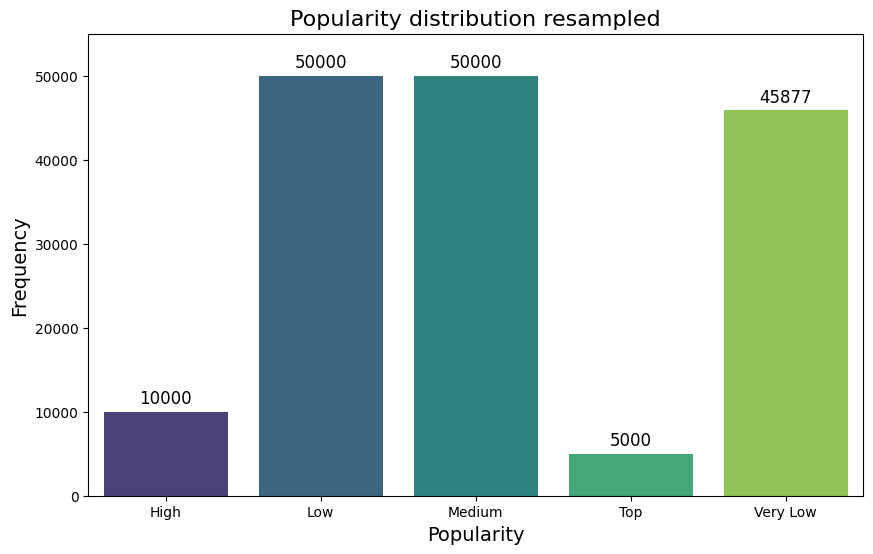

In [214]:
popularity_counts = df_resampled['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_counts.index, y=popularity_counts.values, palette="viridis")
plt.title("Popularity distribution resampled", fontsize=16)
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.ylim((0,55000))

for i, value in enumerate(popularity_counts.values):
    plt.text(i, value + (max(popularity_counts.values) * 0.02),  # Ajusta el espacio dinámicamente
             str(value), ha='center', fontsize=12)
    
plt.show()

### 1.2 Separate train and test data

In [215]:
features = df.drop(columns=['popularity_class'])
target = df['popularity_class']

In [216]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [217]:
X_train

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s
81486,0.98000,0.3340,0.221,0.003990,0.1220,-17.479,0.0963,77.662,0.244,229.200
72431,0.84500,0.6630,0.326,0.301000,0.1110,-10.944,0.0652,170.141,0.510,73.000
175810,0.87400,0.6440,0.433,0.000000,0.8710,-14.049,0.9420,85.827,0.470,251.034
152608,0.55500,0.6350,0.691,0.000000,0.0970,-4.862,0.2580,82.142,0.638,217.419
188271,0.00505,0.5040,0.926,0.011500,0.8720,-5.846,0.0501,106.986,0.232,220.667
...,...,...,...,...,...,...,...,...,...,...
176963,0.95500,0.4920,0.133,0.650000,0.3940,-14.821,0.0548,124.087,0.426,239.267
117952,0.03440,0.8380,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.166,185.707
173685,0.82000,0.5840,0.371,0.000000,0.2650,-18.916,0.9380,87.051,0.579,103.320
43567,0.08690,0.6910,0.567,0.150000,0.0276,-11.624,0.0515,116.705,0.942,316.307


In [218]:
y_train

81486     Very Low
72431     Very Low
175810    Very Low
152608      Medium
188271    Very Low
            ...   
176963         Low
117952      Medium
173685    Very Low
43567       Medium
199340         Low
Name: popularity_class, Length: 186179, dtype: object

In [219]:
X_test

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s
134848,0.00792,0.861,0.6050,0.269000,0.0555,-10.104,0.1430,129.844,0.817,170.295
43959,0.25900,0.820,0.3720,0.000000,0.0880,-12.085,0.0874,109.632,0.871,205.733
135390,0.19800,0.791,0.5750,0.000006,0.0827,-12.167,0.0754,80.925,0.847,252.933
104126,0.95700,0.461,0.0609,0.000000,0.1140,-29.027,0.0798,94.687,0.458,144.640
58631,0.98200,0.368,0.3820,0.010500,0.3240,-13.974,0.0983,106.018,0.274,320.627
...,...,...,...,...,...,...,...,...,...,...
53098,0.46800,0.751,0.4670,0.000088,0.0511,-9.295,0.0314,118.159,0.935,259.267
61551,0.20300,0.561,0.5050,0.470000,0.3260,-13.184,0.0513,105.185,0.652,219.073
193671,0.01950,0.623,0.8240,0.130000,0.0491,-8.971,0.0479,111.356,0.574,279.933
231200,0.15400,0.787,0.5050,0.000034,0.1220,-5.129,0.3160,89.896,0.741,221.595


In [220]:
y_test

134848         Low
43959          Low
135390         Low
104126    Very Low
58631          Low
            ...   
53098          Low
61551          Low
193671      Medium
231200         Low
208652         Low
Name: popularity_class, Length: 46545, dtype: object

### 1.3 Normalization

In [221]:
normalizer = MinMaxScaler()

#Fit to our training data
normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s
0,0.983936,0.297286,0.221205,0.003994,0.113427,0.622373,0.078596,0.222483,0.244,0.039070
1,0.848394,0.650252,0.326313,0.301301,0.102319,0.738652,0.045609,0.657629,0.510,0.010528
2,0.877510,0.629868,0.433422,0.000000,0.869740,0.683404,0.975605,0.260902,0.470,0.043059
3,0.557229,0.620212,0.691685,0.000000,0.088183,0.846871,0.250106,0.243563,0.638,0.036917
4,0.005070,0.479670,0.926925,0.011512,0.870750,0.829362,0.029593,0.360463,0.232,0.037510


In [222]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s
0,0.007952,0.862676,0.605598,0.269269,0.046278,0.753599,0.128129,0.468018,0.817,0.028306
1,0.260040,0.818689,0.372360,0.000000,0.079095,0.718350,0.069156,0.372913,0.871,0.034782
2,0.198795,0.787576,0.575567,0.000006,0.073743,0.716891,0.056428,0.237837,0.847,0.043406
3,0.960843,0.433537,0.060942,0.000000,0.105349,0.416896,0.061095,0.302592,0.458,0.023618
4,0.985944,0.333762,0.382370,0.010511,0.317399,0.684739,0.080717,0.355908,0.274,0.055776


### 1.4 Apply PCA

In [223]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [224]:
pca = PCA(n_components=0.90)
X_train_norm = pca.fit_transform(X_train_norm)
X_test_norm = pca.transform(X_test_norm)

[0.45188428 0.16860702 0.11574036 0.10490838 0.05260356 0.03851847]


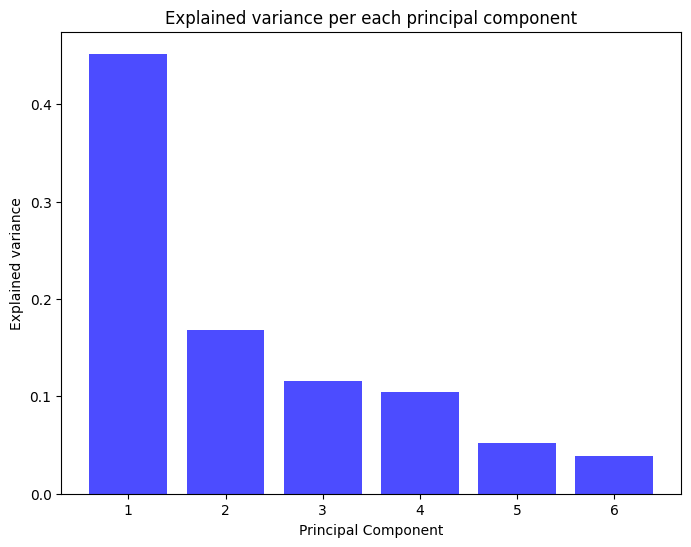

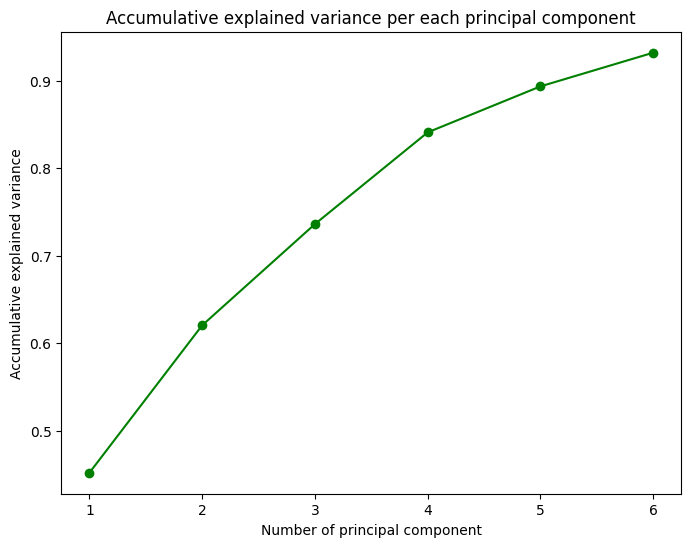

In [225]:
# Visualize the varianze explained per variable
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.title('Explained variance per each principal component')
plt.show()

# Accumulative percentage:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel('Number of principal component')
plt.ylabel('Accumulative explained variance')
plt.title('Accumulative explained variance per each principal component')
plt.show()


In [226]:
print(f'Number of selected components: {pca.n_components_}')

Number of selected components: 6


In [227]:
# Obtening component information
variable_name = features.columns

for i, component in enumerate(pca.components_): 
    print(f"\n {i + 1} Component:") 
    for j, variable in enumerate(variable_name): 
        print(f"{variable}: {component[j]:.4f}")


 1 Component:
acousticness: 0.6525
danceability: -0.2345
energy: -0.4718
instrumentalness: 0.3874
liveness: -0.0265
loudness: -0.1854
speechiness: -0.0147
tempo: -0.0785
valence: -0.3242
duration_s: 0.0033

 2 Component:
acousticness: -0.4981
danceability: -0.1501
energy: 0.0521
instrumentalness: 0.6343
liveness: -0.3383
loudness: 0.0048
speechiness: -0.4145
tempo: 0.0658
valence: -0.1837
duration_s: 0.0056

 3 Component:
acousticness: 0.2101
danceability: 0.3588
energy: -0.2816
instrumentalness: 0.0002
liveness: -0.4649
loudness: -0.0398
speechiness: -0.3276
tempo: -0.0049
valence: 0.6501
duration_s: -0.0115

 4 Component:
acousticness: 0.0979
danceability: 0.1295
energy: 0.2675
instrumentalness: 0.6516
liveness: 0.3808
loudness: -0.0121
speechiness: 0.3477
tempo: -0.0265
valence: 0.4591
duration_s: -0.0024

 5 Component:
acousticness: -0.2357
danceability: 0.6754
energy: -0.2707
instrumentalness: 0.1101
liveness: -0.1370
loudness: -0.0429
speechiness: 0.3724
tempo: -0.3673
valence: 

## 2. Apply ML Models

### 2.1 k-NN

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
def knn_model(number_of_neighbours): 
    
    # Train the model
    knn = KNeighborsClassifier(n_neighbors=number_of_neighbours)
    knn.fit(X_train_norm, y_train)

    # predictions
    y_pred = knn.predict(X_test_norm)

    # classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.show()

    # ROC Curve
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)

    # Obtain the probabilities per each class
    y_prob = knn.predict_proba(X_test_norm)

    # Calculathe roc curve per each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(lb.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Graph
    plt.figure(figsize=(10, 8))

    for i in range(len(lb.classes_)):
        plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for multiclasses classification')
    plt.legend(loc='lower right')
    plt.show()


Accuracy: 0.5922
Precision: 0.5910
Recall: 0.5922
F1 Score: 0.5879

Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.54      0.43       564
         Low       0.60      0.63      0.62     21362
      Medium       0.61      0.66      0.63     15315
         Top       0.24      0.32      0.27        19
    Very Low       0.56      0.39      0.46      9285

    accuracy                           0.59     46545
   macro avg       0.47      0.51      0.48     46545
weighted avg       0.59      0.59      0.59     46545



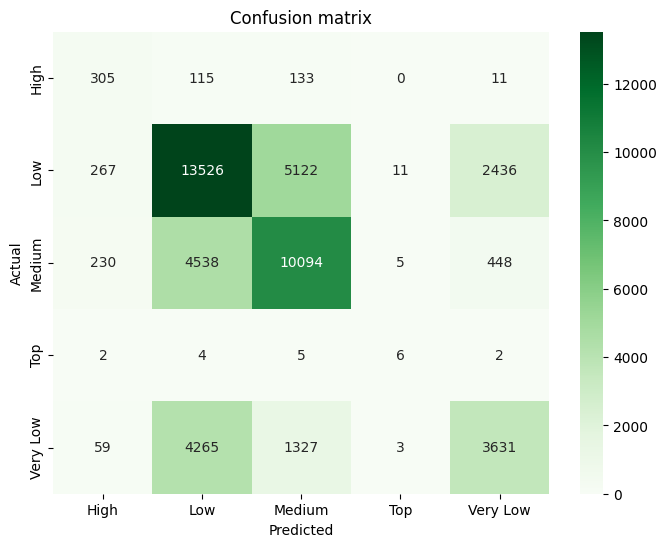

k = 3  || R^2 = 0.5921581265442045
Accuracy: 0.5748
Precision: 0.5768
Recall: 0.5748
F1 Score: 0.5658

Classification Report:
               precision    recall  f1-score   support

        High       0.31      0.40      0.35       564
         Low       0.57      0.69      0.63     21362
      Medium       0.59      0.57      0.58     15315
         Top       0.29      0.21      0.24        19
    Very Low       0.58      0.33      0.42      9285

    accuracy                           0.57     46545
   macro avg       0.47      0.44      0.44     46545
weighted avg       0.58      0.57      0.57     46545



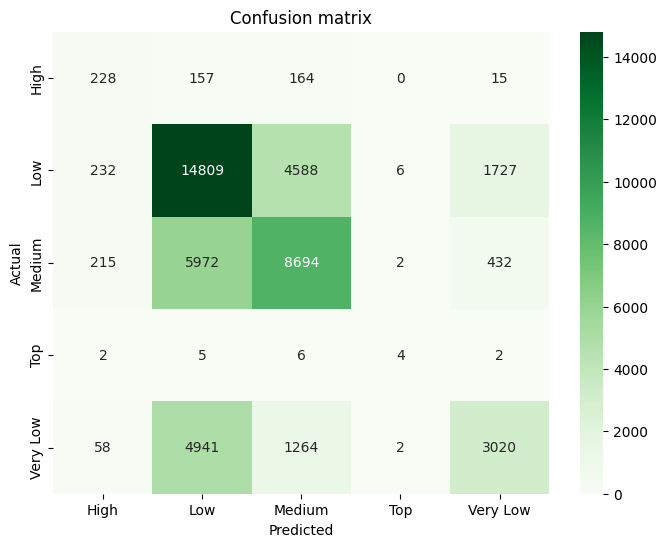

k = 4  || R^2 = 0.574820066602213
Accuracy: 0.5762
Precision: 0.5786
Recall: 0.5762
F1 Score: 0.5711

Classification Report:
               precision    recall  f1-score   support

        High       0.25      0.29      0.26       564
         Low       0.58      0.65      0.61     21362
      Medium       0.57      0.61      0.59     15315
         Top       0.33      0.11      0.16        19
    Very Low       0.60      0.38      0.46      9285

    accuracy                           0.58     46545
   macro avg       0.47      0.40      0.42     46545
weighted avg       0.58      0.58      0.57     46545



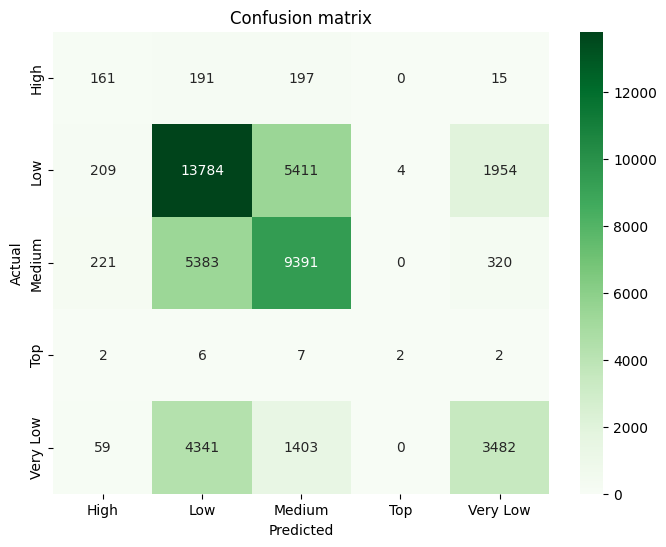

k = 5  || R^2 = 0.5762165646148888
Accuracy: 0.5680
Precision: 0.5713
Recall: 0.5680
F1 Score: 0.5602

Classification Report:
               precision    recall  f1-score   support

        High       0.23      0.23      0.23       564
         Low       0.57      0.68      0.62     21362
      Medium       0.57      0.56      0.56     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.61      0.35      0.44      9285

    accuracy                           0.57     46545
   macro avg       0.39      0.36      0.37     46545
weighted avg       0.57      0.57      0.56     46545



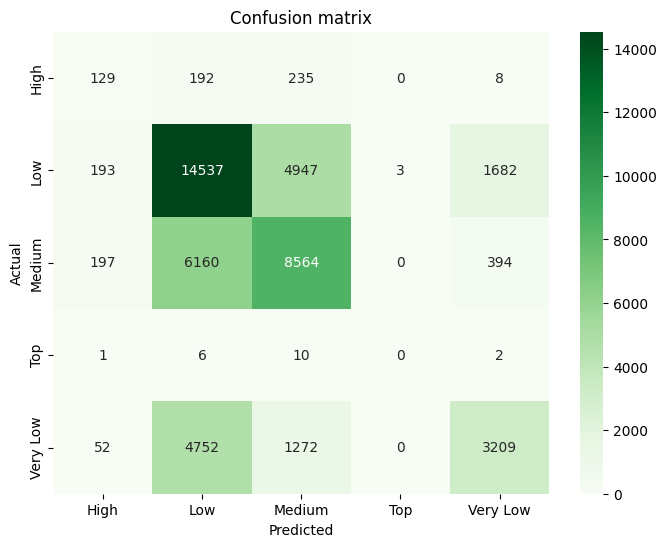

k = 6  || R^2 = 0.568030937802127
Accuracy: 0.5681
Precision: 0.5693
Recall: 0.5681
F1 Score: 0.5627

Classification Report:
               precision    recall  f1-score   support

        High       0.20      0.15      0.17       564
         Low       0.57      0.64      0.61     21362
      Medium       0.56      0.59      0.57     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.60      0.38      0.47      9285

    accuracy                           0.57     46545
   macro avg       0.39      0.35      0.36     46545
weighted avg       0.57      0.57      0.56     46545



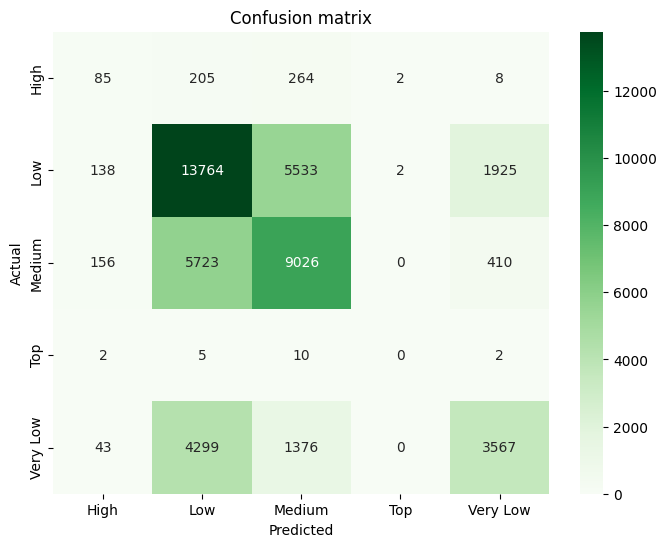

k = 7  || R^2 = 0.5680953915565582
Accuracy: 0.5631
Precision: 0.5677
Recall: 0.5631
F1 Score: 0.5550

Classification Report:
               precision    recall  f1-score   support

        High       0.19      0.12      0.15       564
         Low       0.56      0.67      0.61     21362
      Medium       0.55      0.56      0.56     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.63      0.35      0.45      9285

    accuracy                           0.56     46545
   macro avg       0.39      0.34      0.35     46545
weighted avg       0.57      0.56      0.55     46545



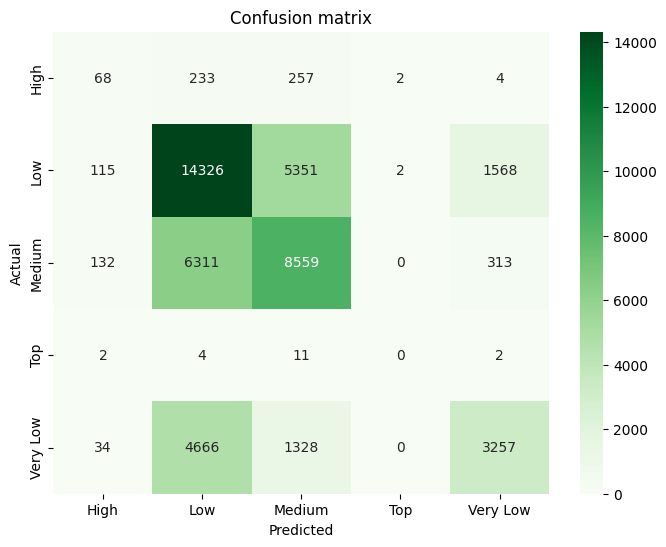

k = 8  || R^2 = 0.5631109678805457
Accuracy: 0.5632
Precision: 0.5658
Recall: 0.5632
F1 Score: 0.5567

Classification Report:
               precision    recall  f1-score   support

        High       0.18      0.10      0.13       564
         Low       0.56      0.65      0.60     21362
      Medium       0.55      0.57      0.56     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.62      0.38      0.47      9285

    accuracy                           0.56     46545
   macro avg       0.38      0.34      0.35     46545
weighted avg       0.57      0.56      0.56     46545



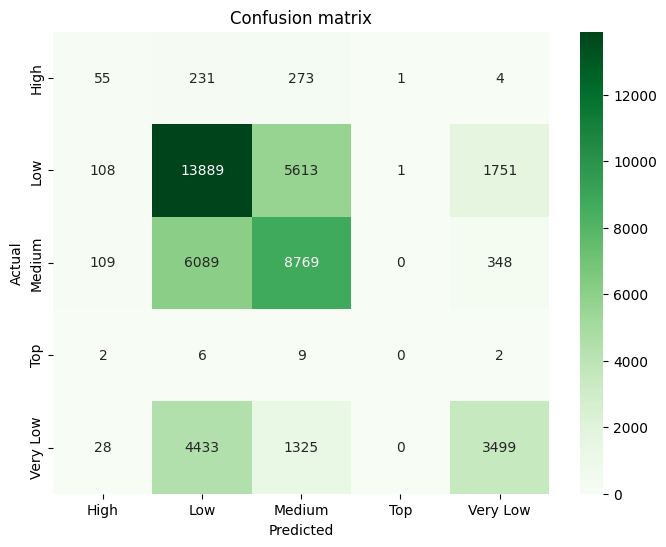

k = 9  || R^2 = 0.5631539370501665
Accuracy: 0.5612
Precision: 0.5650
Recall: 0.5612
F1 Score: 0.5530

Classification Report:
               precision    recall  f1-score   support

        High       0.21      0.08      0.12       564
         Low       0.56      0.66      0.61     21362
      Medium       0.55      0.56      0.55     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.63      0.36      0.46      9285

    accuracy                           0.56     46545
   macro avg       0.39      0.33      0.35     46545
weighted avg       0.57      0.56      0.55     46545



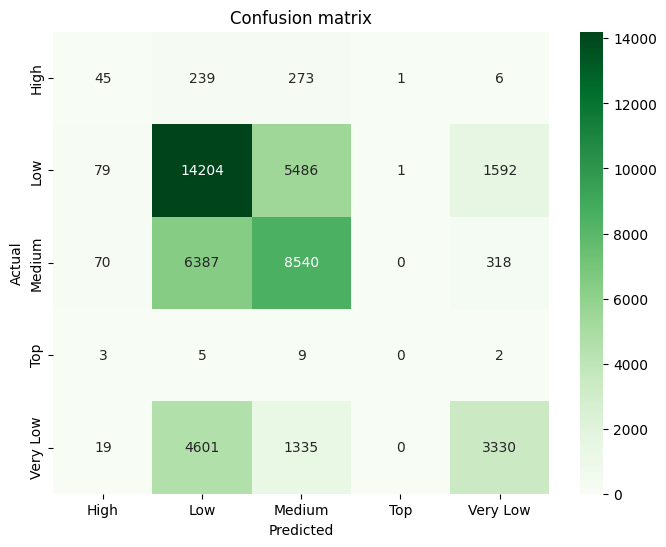

k = 10  || R^2 = 0.5611558706627995


c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5621
Precision: 0.5659
Recall: 0.5621
F1 Score: 0.5547


c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

        High       0.22      0.07      0.10       564
         Low       0.56      0.65      0.60     21362
      Medium       0.54      0.57      0.56     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.64      0.37      0.47      9285

    accuracy                           0.56     46545
   macro avg       0.39      0.33      0.35     46545
weighted avg       0.57      0.56      0.55     46545



c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


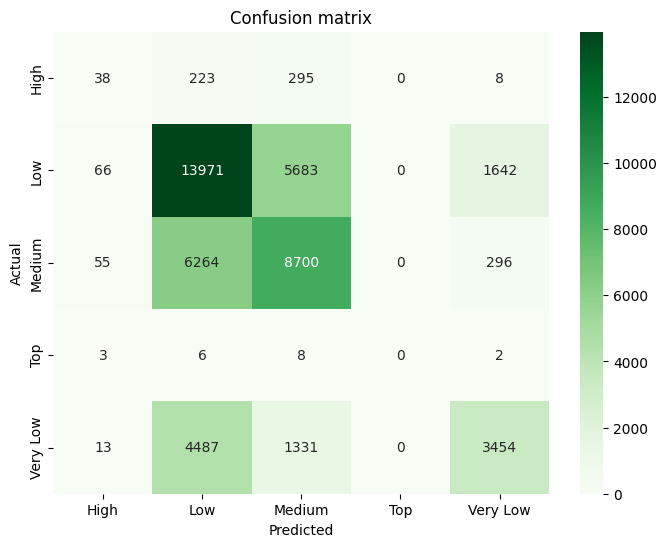

k = 11  || R^2 = 0.562101192394457


In [230]:
l = []
for i in range(3,12):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm, y_train)
    r2 = knn.score(X_test_norm, y_test)
    l.append(r2)
    
    y_pred = knn.predict(X_test_norm)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.show()
        
        
    print(f"k = {i}  || R^2 = {r2}")

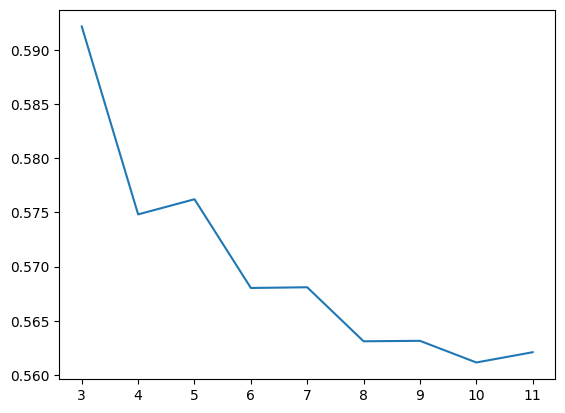

In [231]:
plt.plot(list(range(3,12)), l)

Accuracy: 0.5922
Precision: 0.5910
Recall: 0.5922
F1 Score: 0.5879

Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.54      0.43       564
         Low       0.60      0.63      0.62     21362
      Medium       0.61      0.66      0.63     15315
         Top       0.24      0.32      0.27        19
    Very Low       0.56      0.39      0.46      9285

    accuracy                           0.59     46545
   macro avg       0.47      0.51      0.48     46545
weighted avg       0.59      0.59      0.59     46545



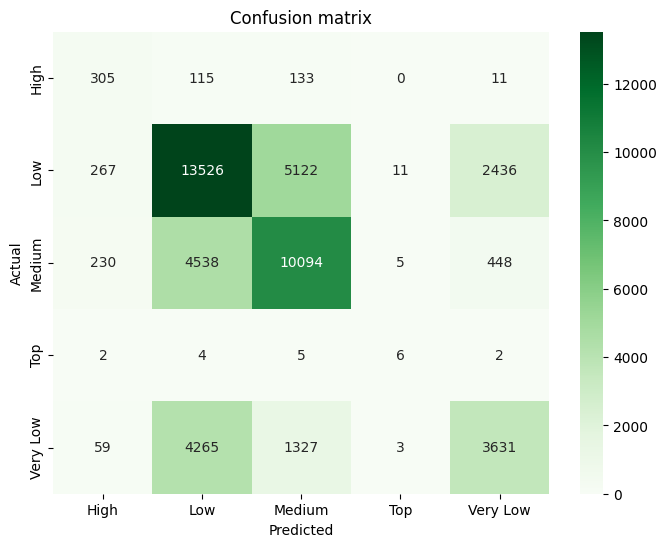

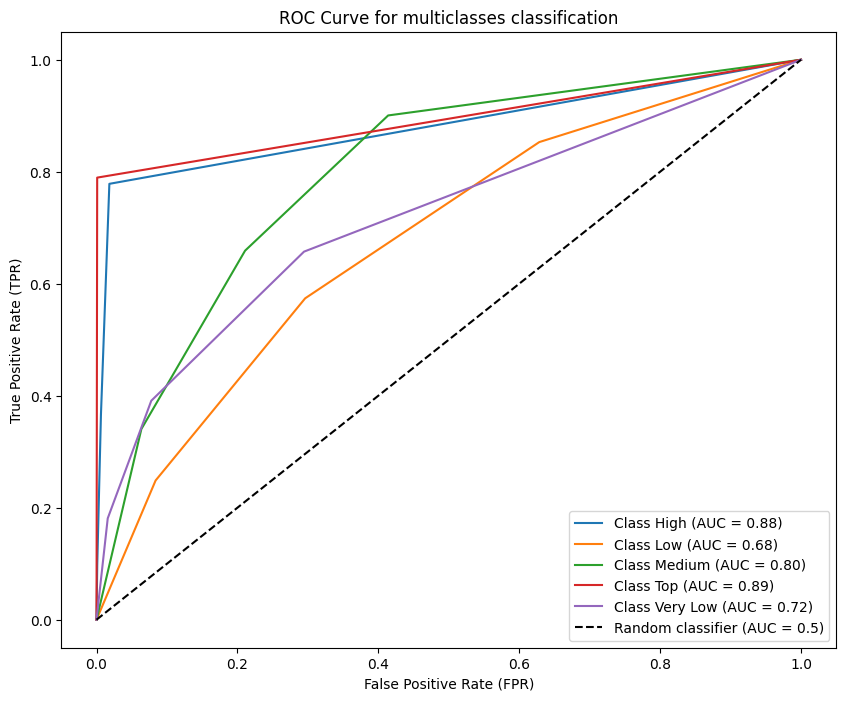

In [232]:
knn_model(3)

###  2.2 Logic Regression

c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5256
Precision: 0.5353
Recall: 0.5256
F1 Score: 0.5088


c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       564
         Low       0.52      0.68      0.59     21362
      Medium       0.51      0.49      0.50     15315
         Top       0.00      0.00      0.00        19
    Very Low       0.65      0.26      0.38      9285

    accuracy                           0.53     46545
   macro avg       0.34      0.29      0.29     46545
weighted avg       0.54      0.53      0.51     46545



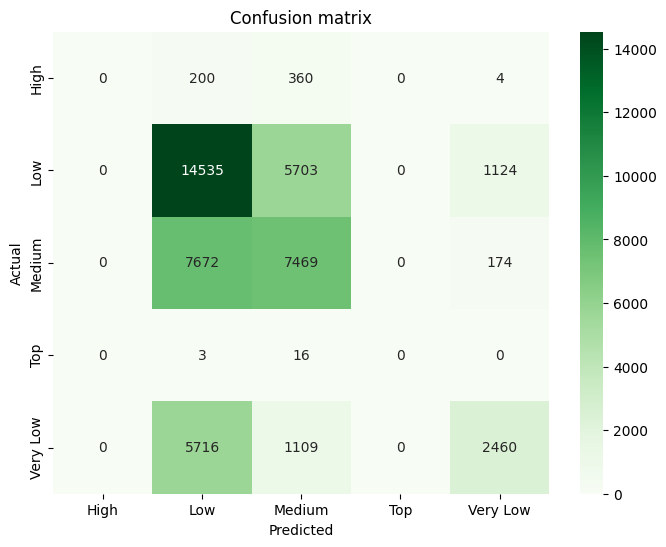

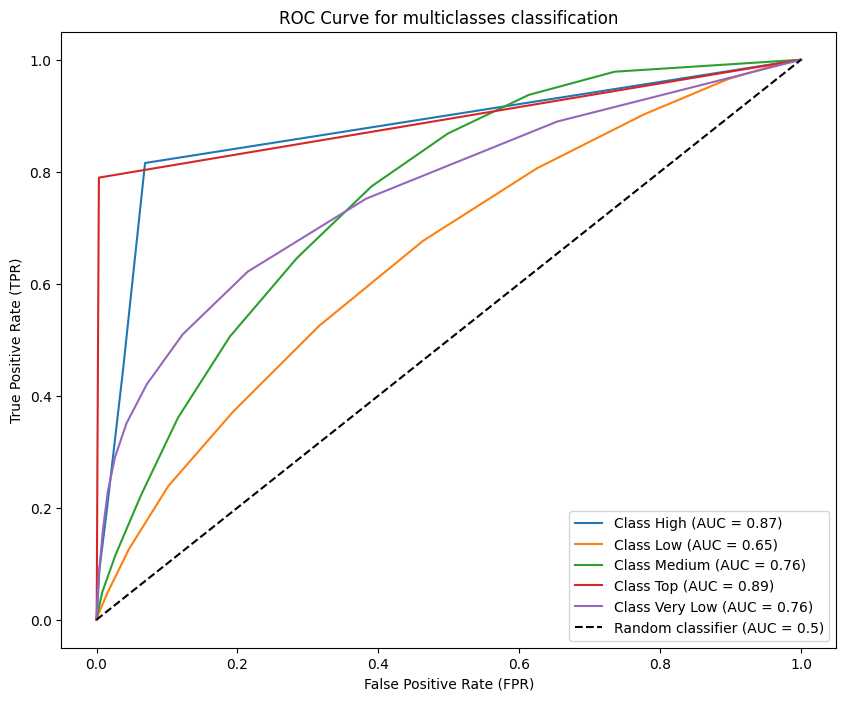

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model
model = LogisticRegression(max_iter=1000)

# Adjust the model
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)

# Calculate the accuracy 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Obtain the probabilities per each class
y_prob = knn.predict_proba(X_test_norm)

# Calculathe roc curve per each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graph
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for multiclasses classification')
plt.legend(loc='lower right')
plt.show()



### 2.3 Random Forest

In [234]:
y_test.value_counts()

popularity_class
Low         21362
Medium      15315
Very Low     9285
High          564
Top            19
Name: count, dtype: int64

In [235]:
y_train.value_counts()

popularity_class
Low         85883
Medium      61331
Very Low    36592
High         2285
Top            88
Name: count, dtype: int64

Accuracy: 0.7113
Precision: 0.7126
Recall: 0.7113
F1 Score: 0.7023

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.76      0.85       564
         Low       0.68      0.79      0.73     21362
      Medium       0.77      0.78      0.78     15315
         Top       0.94      0.79      0.86        19
    Very Low       0.69      0.40      0.51      9285

    accuracy                           0.71     46545
   macro avg       0.81      0.70      0.74     46545
weighted avg       0.71      0.71      0.70     46545



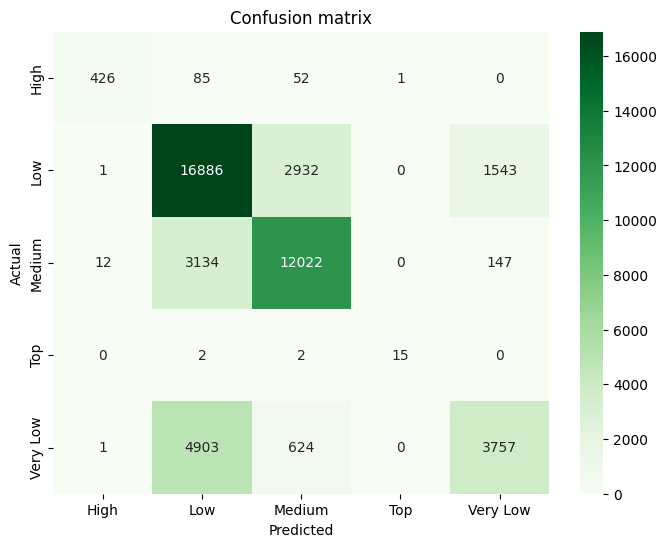

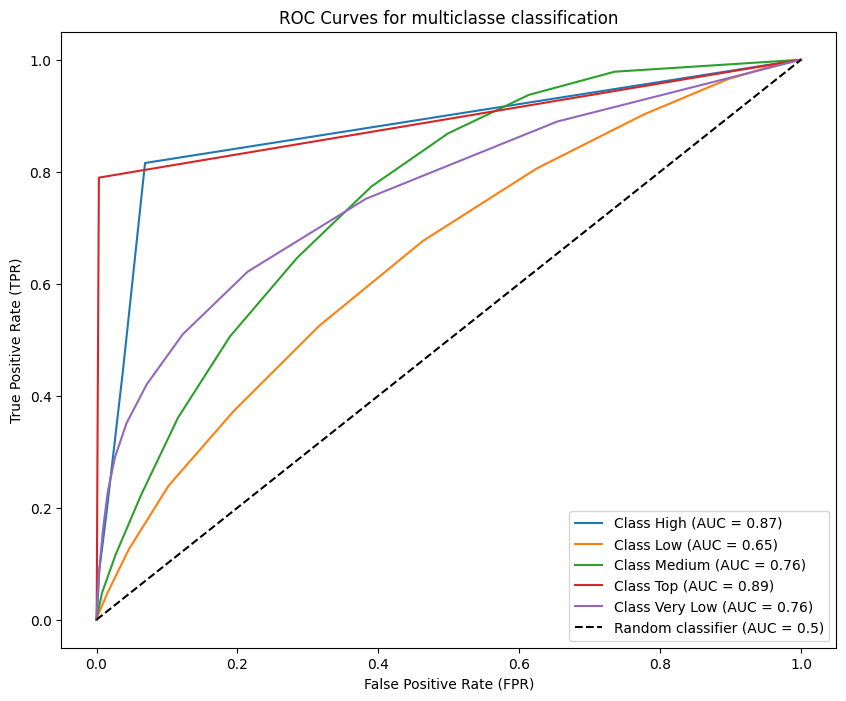

In [237]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
model_rf.fit(X_train_norm, y_train)
y_pred_rf = model_rf.predict(X_test_norm)


# classification metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Obtain the probabilities per each class
y_prob = knn.predict_proba(X_test_norm)

# Calculathe roc curve per each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graph
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for multiclasse classification')
plt.legend(loc='lower right')
plt.show()


### 2.4 XG Boost